In [13]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [14]:
model = torch.load('data_storage/CNN_L8.pth')
model

OrderedDict([('conv.1.weight',
              tensor([[[[-0.6932,  0.0027, -0.8188],
                        [ 1.0035, -1.4636,  1.3325],
                        [ 1.0849,  1.2422, -1.6957]]],
              
              
                      [[[ 0.0554,  1.1798,  0.5881],
                        [-1.2381,  2.1358,  0.5251],
                        [-1.3652, -1.2417, -0.6608]]],
              
              
                      [[[ 0.4387,  0.4259, -0.0945],
                        [ 0.9846,  1.4272,  1.2846],
                        [ 0.0443,  0.7068,  0.7092]]],
              
              
                      [[[-0.0155,  0.1324,  1.1245],
                        [ 1.3382, -1.4552,  1.7090],
                        [-0.4915, -1.4950, -0.8517]]],
              
              
                      [[[ 1.4692, -0.5619,  1.2729],
                        [ 0.3387, -0.1612, -2.3551],
                        [ 1.4673, -1.3588, -0.1100]]]])),
             ('fc.0.weight',
            

In [15]:
# conv.1.weightの重みテンソルを取得
conv1_weight = model['conv.1.weight']
conv1_weight

tensor([[[[-0.6932,  0.0027, -0.8188],
          [ 1.0035, -1.4636,  1.3325],
          [ 1.0849,  1.2422, -1.6957]]],


        [[[ 0.0554,  1.1798,  0.5881],
          [-1.2381,  2.1358,  0.5251],
          [-1.3652, -1.2417, -0.6608]]],


        [[[ 0.4387,  0.4259, -0.0945],
          [ 0.9846,  1.4272,  1.2846],
          [ 0.0443,  0.7068,  0.7092]]],


        [[[-0.0155,  0.1324,  1.1245],
          [ 1.3382, -1.4552,  1.7090],
          [-0.4915, -1.4950, -0.8517]]],


        [[[ 1.4692, -0.5619,  1.2729],
          [ 0.3387, -0.1612, -2.3551],
          [ 1.4673, -1.3588, -0.1100]]]])

In [16]:
# NumPy配列に変換
conv1_weight_np = conv1_weight.numpy()

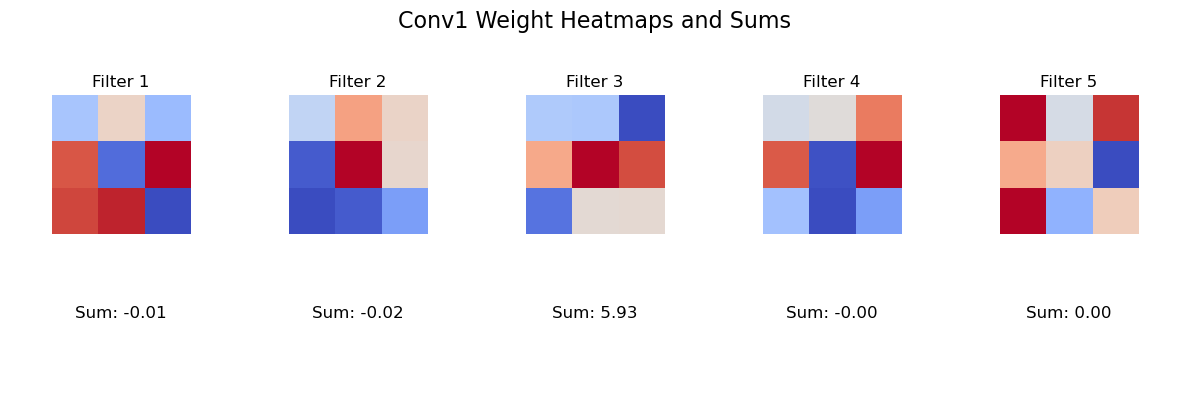

In [17]:
# 各重みフィルターに対して成分の和を計算
filter_sums = [np.sum(filter) for filter in conv1_weight_np]

# 5つの重みフィルターとその成分の和を1つの図にプロット
plt.figure(figsize=(12, 4))
for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.imshow(conv1_weight_np[i, 0], cmap='coolwarm', interpolation='nearest')
    plt.title(f'Filter {i+1}')
    plt.axis('off')
    
    plt.subplot(2, 5, i+6)
    plt.text(0.5, 0.5, f'Sum: {filter_sums[i]:.2f}', fontsize=12, ha='center')
    plt.axis('off')

plt.suptitle('Conv1 Weight Heatmaps and Sums', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [18]:
fc_weight = model['fc.0.weight']
fc_weight

tensor([[ 0.5891,  0.1024,  0.4252,  ...,  0.6574,  0.4101,  0.4061],
        [-0.0580,  0.4535, -0.2194,  ...,  0.3225, -0.0930,  0.1126],
        [-0.1562,  0.3143,  0.3544,  ..., -0.2280,  0.2087,  0.2909],
        ...,
        [-0.1900, -0.1090, -0.2482,  ..., -0.2184, -0.2936, -0.2432],
        [-0.0019, -0.0020, -0.0025,  ..., -0.0062, -0.0018, -0.0022],
        [-0.0019, -0.0020, -0.0025,  ..., -0.0062, -0.0018, -0.0022]])

In [19]:
fc_weight.size()

torch.Size([25, 80])

In [20]:
# NumPy配列に変換
fc_weight_np = fc_weight.numpy()
# データを転置して正方形のデータに変形
fc_weight_np_square = fc_weight_np.T

In [21]:
fc_weight_np_square

array([[ 0.5890754 , -0.05802701, -0.15622579, ..., -0.18996169,
        -0.0019217 , -0.00191685],
       [ 0.10243693,  0.45347354,  0.31430703, ..., -0.10904182,
        -0.00201395, -0.0020106 ],
       [ 0.42523056, -0.21945   ,  0.35441104, ..., -0.2482318 ,
        -0.00247639, -0.00251403],
       ...,
       [ 0.6574027 ,  0.32250226, -0.2280109 , ..., -0.21835762,
        -0.00623573, -0.0062282 ],
       [ 0.41013315, -0.09298486,  0.20870377, ..., -0.29357746,
        -0.00176124, -0.0017591 ],
       [ 0.40614837,  0.11256015,  0.29091734, ..., -0.24321908,
        -0.00216896, -0.00216634]], dtype=float32)

In [22]:
fc_weight_np_square.shape

(80, 25)

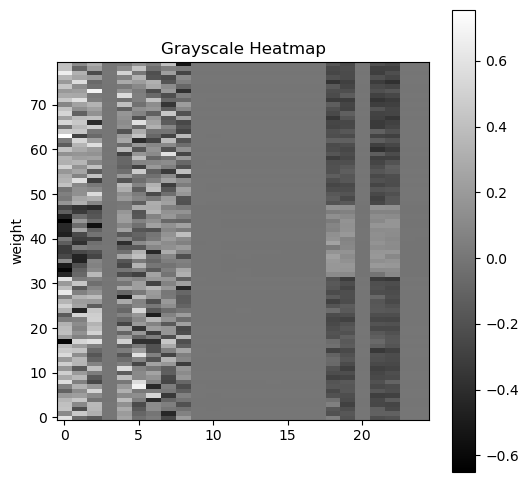

In [23]:
# ヒートマップをプロット（白黒）
plt.figure(figsize=(6, 6))
plt.imshow(fc_weight_np_square, cmap='gray', interpolation='nearest', aspect=0.30, origin='lower')
plt.colorbar()
plt.title('Grayscale Heatmap')


# x軸とy軸に名前を付ける
plt.ylabel('weight')

plt.show()

In [24]:
fc_weight_np_square_sum = np.sum(fc_weight_np_square, axis=0)
fc_weight_np_square_sum

array([ 13.523707  ,  10.690762  ,   9.037909  ,  -0.1441324 ,
         6.513225  ,   6.4939356 ,   2.8263454 ,   2.4337394 ,
        -0.2029596 ,  -0.29075503,  -0.30263078,  -0.33080676,
        -0.31364012,  -0.32986462,  -0.32898426,  -0.338562  ,
        -0.3347796 ,  -0.3378744 , -10.106697  , -11.599127  ,
        -0.3359482 , -12.615854  , -12.719589  ,  -0.33770454,
        -0.33822757], dtype=float32)

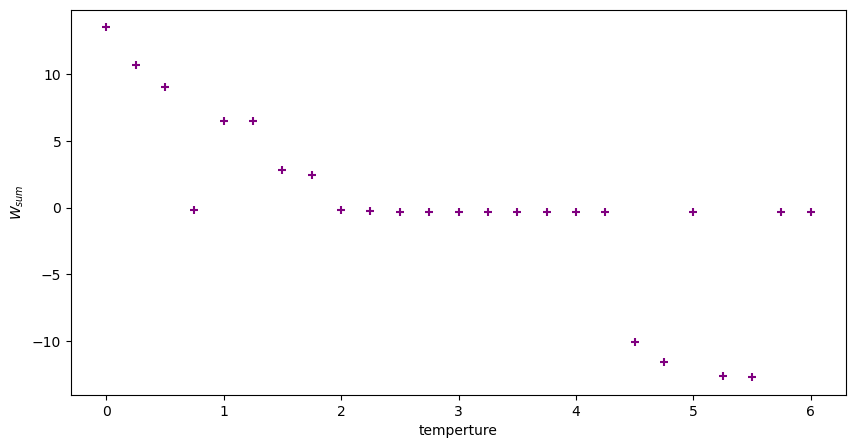

In [25]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x, y, marker='+', color='purple')
plt.xlabel('temperture')
plt.ylabel('$W_{sum}$')

plt.show()

In [26]:
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

x_inverse

[0,
 4.0,
 2.0,
 1.3333333333333333,
 1.0,
 0.8,
 0.6666666666666666,
 0.5714285714285714,
 0.5,
 0.4444444444444444,
 0.4,
 0.36363636363636365,
 0.3333333333333333,
 0.3076923076923077,
 0.2857142857142857,
 0.26666666666666666,
 0.25,
 0.23529411764705882,
 0.2222222222222222,
 0.21052631578947367,
 0.2,
 0.19047619047619047,
 0.18181818181818182,
 0.17391304347826086,
 0.16666666666666666]

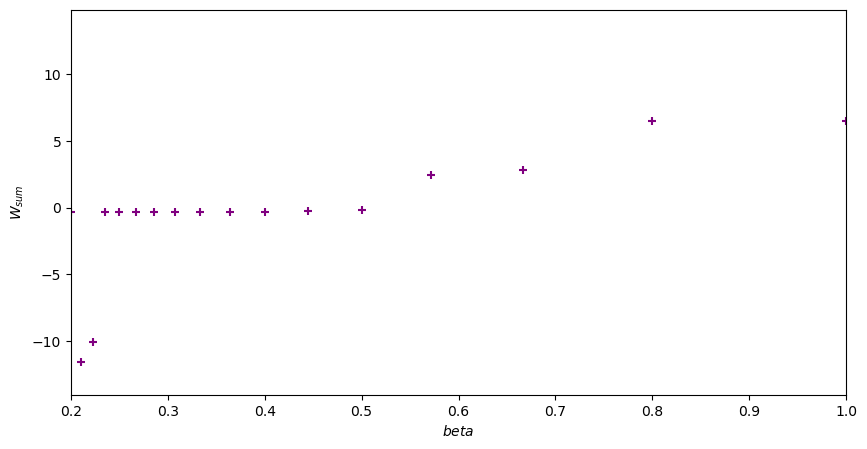

In [27]:
x = [x*0.25 for x in range(len(fc_weight_np_square_sum))]
y = fc_weight_np_square_sum

# x軸の値を逆数に変換
x_inverse = []
for val in x:
    if val != 0:
        x_inverse.append(1 / val)
    else:
        x_inverse.append(0)  # ゼロで割り算を避けるため

# プロット
plt.figure(figsize=(10, 5))
plt.scatter(x_inverse, y, marker='+', color='purple')
plt.xlabel('$beta$')
plt.ylabel('$W_{sum}$')

# x軸の範囲を指定
plt.xlim(0.2, 1) 

plt.show()